In [1]:
import numpy as np
import torch
import sys
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append("../src")
from models import MLP
from data import gen_rnd_ds
from losses import LinearClassification
from block_analysis import block_hessian, curvature_effects

from lr_calibrate import lr_calibrate

## Helpers

In [2]:
def get_model_ds_loss():    
    model =  MLP(inp_dim, hid_dim, out_dim, nlayer, bias, mode).cuda(device)
    ds = gen_rnd_ds(inp_dim, inp_mean, inp_var, 
                   out_dim, nsamp, device)
    loss_fn = LinearClassification(out_dim)
    return model, ds, loss_fn

## Params

In [3]:
# Model
mode = "linear"
bias = False
nlayer = 5
inp_dim = 10 
out_dim = 10
hid_dim = 100

# Data parameters
nsamp = 100
inp_mean = 0
inp_var = 1

# Others
device = 0


LR 1.00E-08 	 || Delta=0.00E+00	 ||Error=8.06E-08  	|| hoe=96923.421875 	|| H=96923.4140625	||ratio=1.0000000806048783
LR 1.00E-07 	 || Delta=0.00E+00	 ||Error=1.01E-07  	|| hoe=9692.341796875 	|| H=9692.3408203125	||ratio=1.0000001007561041
LR 1.00E-06 	 || Delta=0.00E+00	 ||Error=3.29E-01  	|| hoe=969.234130859375 	|| H=729.12744140625	||ratio=1.32930688905363
LR 1.00E-05 	 || Delta=2.92E-09	 ||Error=3.16E-02  	|| hoe=38.515663146972656 	|| H=39.734375	||ratio=0.9693285259167322
LR 1.00E-04 	 || Delta=4.84E-08	 ||Error=2.86E-02  	|| hoe=0.006586730945855379 	|| H=0.006403583101928234	||ratio=1.028600838157624
LR 1.00E-03 	 || Delta=4.84E-07	 ||Error=7.89E+00  	|| hoe=0.0003021796001121402 	|| H=-0.0020825937390327454	||ratio=-0.14509771850773287
LR 1.00E-02 	 || Delta=4.85E-06	 ||Error=1.72E+01  	|| hoe=6.239133654162288e-06 	|| H=-3.8482994568767026e-07	||ratio=-16.212703101920237
LR 1.00E-01 	 || Delta=4.85E-05	 ||Error=1.16E-01  	|| hoe=-1.215084921568632e-07 	|| H=-1.088665158022

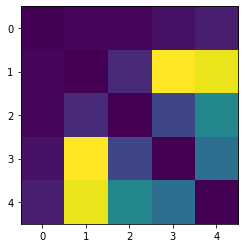

In [4]:
model, ds, loss_fn = get_model_ds_loss()
lr = lr_calibrate(model, ds, loss_fn, -8, 8, 1, True, True)
H = block_hessian(model, ds, loss_fn, lr)
plt.imshow(H.abs().cpu().numpy())

In [5]:
lr

0.8986694950475259